# Упражнение: Интерактивная диаграмма в Альтаире


Имя: Екатерина

Фамилия: Макарова

почта: makarovaep2212@gmail.com

Вариант: 2

**5.1** Реализовать графики в Altair с использованием следующих ключей:

In [ ]:
!pip3 install altair

In [ ]:
!pip3 install vega_datasets

In [1]:
import altair as alt

In [2]:
from vega_datasets import data

cars = data.cars()
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


Данные:

name - наименование машины

Miles_per_Gallon - Миль_на_галлон

Cylinders	- Цилиндры

Displacement - Объем двигателя

Horsepower	- Лошадиные силы

Weight_in_lbs	- Вес в фунтах

Acceleration	- Ускорение

Year	- Год

Origin - Страна производства


<table>
  <tr>
    <th>Тип данных</th>
    <th>Код</th>
    <th>Описание</th>
  </tr>
  <tr>
    <td>quantitative</td>
    <td>Q</td>
    <td>Числовая величина (действительная)</td>
  </tr>
  <tr>
    <td>nominal</td>
    <td>N</td>
    <td>Наименование / Неупорядоченный категориальный</td>
  </tr>
  <tr>
    <td>ordinal</td>
    <td>O</td>
    <td>Упорярядоченный категориальный</td>
  </tr>
  <tr>
    <td>temporal</td>
    <td>T</td>
    <td>Дата / время</td>
  </tr>
</table>

2 вариант :

Метки: mark_point(), mark_line().

Столбцы данных: 'Cylinders', 'Displacement'.

Кодировки: opacity, text, tooltip.

In [3]:
point = alt.Chart(cars).mark_point(opacity=0.2).encode(
    x='Displacement',
    y='Cylinders:N',
    tooltip=['Name','Displacement', 'Origin'],
    color= 'Cylinders:N'
)


text = point.mark_text(
    align='left',
    dx=7,
    angle = 20,
    baseline= 'top'
).encode(
    text='Displacement'
)

(point + text).properties(title ='Зависимость объёма двигателя от количества цилиндров',width=1000,height=200)

alt.LayerChart(...)

Исходя из представленных данных, можно сделать вывод о том, что чем больше цилиндров в двигатели, тем больше его объём.

In [4]:
max_horsepower = cars.groupby('Cylinders')['Horsepower'].transform('max')

line = alt.Chart(cars).mark_line(point=True).encode(
    x="Horsepower",
    y="Displacement",
    color="Cylinders:N",
    tooltip=["Name", "Year:T", "Horsepower", "Displacement"]
)

max_values = cars.loc[cars.groupby('Cylinders')['Horsepower'].idxmax()]

text = alt.Chart(max_values).mark_text(
    align='left',
    dx=5,
    dy=-5
).encode(
    x='Horsepower',
    y='Displacement',
    text='Cylinders:N',
    color='Cylinders:N'
)

(line + text).properties(title ="Зависимость лошадиных сил от объёма двигателя с указанием количества цилиндров",width=1000, height=400)

alt.LayerChart(...)

5.2. Используя данные об автомобилях, создайте диаграмму рассеяния (*scatter-plot*), на которой *размер* (*size*) точек становится больше при наведении на них курсора.


In [5]:
kursor = alt.selection_single(on='mouseover', nearest=True)

chart = alt.Chart(cars).mark_circle().encode(
    x='Displacement',
    y='Miles_per_Gallon',
    color='Origin:N',
     tooltip=['Name','Miles_per_Gallon','Displacement'],
    size=alt.condition(kursor, alt.SizeValue(300),alt.SizeValue(70))
).add_selection(
    kursor
).interactive()

chart.properties(title = "График рассеивания Миль на галон и Объём двигателя")

alt.Chart(...)

Исходя из представленного графика рассеивания, можно сделать вывод о том, что чем меньше объём двигателя, тем больше расход топлива на милю, а также можно сделать вывод о том, что машины, произведённе в америке производятся с большим объёмом двигателя, в отличии от европейских и японских машин

5.3. Используя данные об автомобилях, создайте двухпанельную (*two-panel*) гистограмму (количество миль на галлон на одной панели, количество лошадиных сил на другой), где вы можете перетащить мышь, чтобы выбрать данные на левой панели, чтобы отфильтровать данные на второй панели.

In [6]:
interval = alt.selection_interval()

scatter = alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Displacement:Q',
    color=alt.condition(interval, 'Origin:N', alt.value('lightgray'))
).add_selection(
    interval
)

hist = alt.Chart(cars).mark_bar().encode(
    x='Horsepower:Q',
    y='Origin',
    color='Origin'
).transform_filter(
    interval
)

scatter & hist

alt.VConcatChart(...)

5.4. Измените приведенный выше пример диаграммы разброса и гистограммы, чтобы

- панорамировать и увеличивать диаграмму рассеяния;
- гистограмма отражала только те точки, которые видны в данный момент.


In [7]:
interval = alt.selection_interval(bind='scales')

scatter = alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Displacement:Q',
    color=alt.condition(interval, 'Origin:N', alt.value('lightgray'))
).add_selection(
    interval
)

hist = alt.Chart(cars).mark_bar().encode(
    x='Horsepower:Q',
    y='Origin',
    color='Origin'
).transform_filter(
    interval
)

scatter & hist

alt.VConcatChart(...)

5.5. Создайте диаграмму на основе самостоятельно сгенерированных данных и постройте кривые синуса и косинуса с помощью `transform_calculate`.

2 Вариант

x = pd.DataFrame({'x': np.linspace(-len(Имя), len(Имя))})

In [8]:
import pandas as pd
import numpy as np

In [9]:
x = pd.DataFrame({'x':np.linspace(-len("Екатерина"),len("Екатерина"))})
x

,x
0,-9.000000
1,-8.632653
2,-8.265306
3,-7.897959
4,-7.530612
5,-7.163265
6,-6.795918
7,-6.428571
8,-6.061224
9,-5.693878


In [43]:
sin_chart = alt.Chart(x).transform_calculate(
    sin='sin(datum.x)'
).mark_line(color = 'lime', point={'color': 'lime'}).encode(
    x='x',
    y='sin:Q',
    tooltip = [alt.Tooltip('sin:Q', title='Значение sin')])

cos_chart = alt.Chart(x).transform_calculate(
    cos='cos(datum.x)'
).mark_line(color='purple', point={'color': 'purple'}).encode(
    x='x',
    y='cos:Q',
    tooltip = [alt.Tooltip('cos:Q', title='Значение cos')])

joinchart = (sin_chart + cos_chart).properties(width=800, height=300, title='График sin и cos')

joinchart

alt.LayerChart(...)

Были построены две кривые - синуса и косинуса, при наведении на определённую точку можно увидеть значение функции. Зелёное - синус, фиолетовое - косинус.

Для проверки отработка transform_calculate, расчёт синуса и косинуса был проверен в сторонней программе.

# **Проверка построинных графиков**
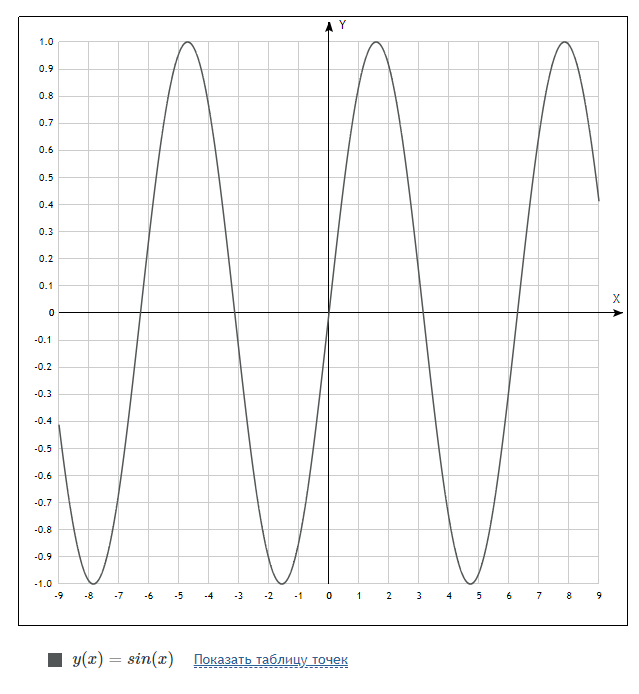
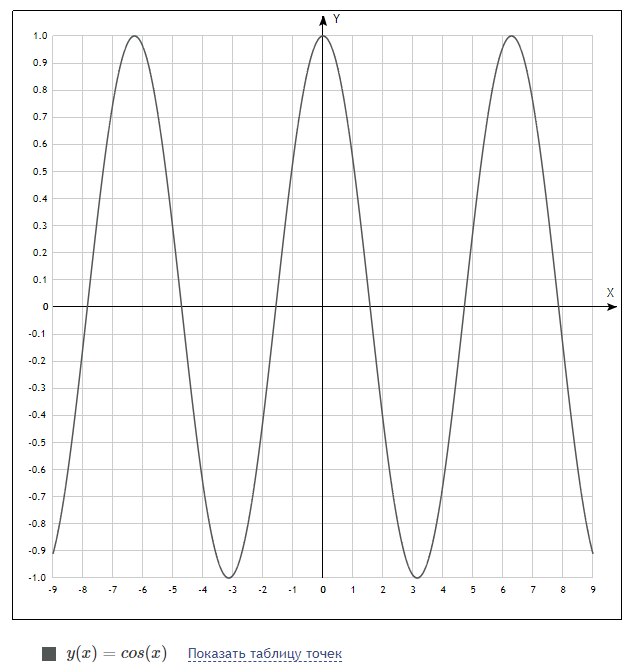

5.6. Используйте `transform_filter` на диаграмме задания 4 и удалите области графика, где значение кривой косинуса меньше значения кривой синуса.

In [20]:
df = pd.DataFrame({'x': np.linspace(-len("Екатерина"), len("Екатерина"))})

df['sin'] = np.sin(df['x'])
df['cos'] = np.cos(df['x'])

df.head()

,x,sin,cos
0,-9.000000,-0.412118,-0.911130
1,-8.632653,-0.711847,-0.702334
2,-8.265306,-0.916592,-0.399824
3,-7.897959,-0.999033,-0.043963
4,-7.530612,-0.948170,0.317763


In [42]:
sin_chart = alt.Chart(df).mark_line(
    color = 'lime', point={'color': 'lime'}).encode(
    x='x',
    y='sin:Q',
    tooltip = [alt.Tooltip('sin:Q', title='Значение sin')])

cos_chart = alt.Chart(df).transform_filter(
    alt.datum.cos >= alt.datum.sin
).mark_point().encode(
    color = alt.value('purple'),
    x='x',
    y='cos:Q',
    tooltip = [alt.Tooltip('cos:Q', title='Значение cos')])

joinchart = (sin_chart + cos_chart).properties(width=800, height=300, title='График sin и cos')
joinchart

alt.LayerChart(...)

Таким образом, с помощью transfrom_filter были убраны значения косинуса, которые меньше значения синуса. При наведении на точку графика можно увидеть значение.

5.7. Используйте любимую визуализацию из предыдущего упражнения и настройте эстетику графика:


- настроить вид меток (`size`, `strokewidth` и т. д.).

- изменить оси и названия графика.

- изменить пределы `x` и `y`.

In [ ]:
point = alt.Chart(cars).mark_point(opacity=0.2, size = 50, strokeWidth= 3, shape = "diamond").encode(
    x=alt.X('Displacement', title = "Объём двигателя", scale=alt.Scale(domain=[60, 500])),
    y=alt.Y('Cylinders:N', title = "Количество цилиндров"),
    tooltip=['Name','Displacement', 'Origin'],
    color= 'Cylinders:N'
)


text = point.mark_text(
    align='left',
    dx=7,
    angle = 20,
    baseline= 'top'
).encode(
    text='Displacement'
)


(point + text).properties(title ='Зависимость объёма двигателя от количества цилиндров',width=1000,height=200)

alt.LayerChart(...)

Была изменены форма точек, начало и конец графика, изменён размер, измененые названия и оси графика.

5.8. Используйте завершение табуляции в `alt.Chart.configure_`, чтобы увидеть различные параметры конфигурации, затем используйте `?`, чтобы увидеть документацию по функциям.


In [ ]:
alt.Chart.configure_mark?
#alt.Chart.configure_point?

После выполнения кода выводится справка документации по функциям
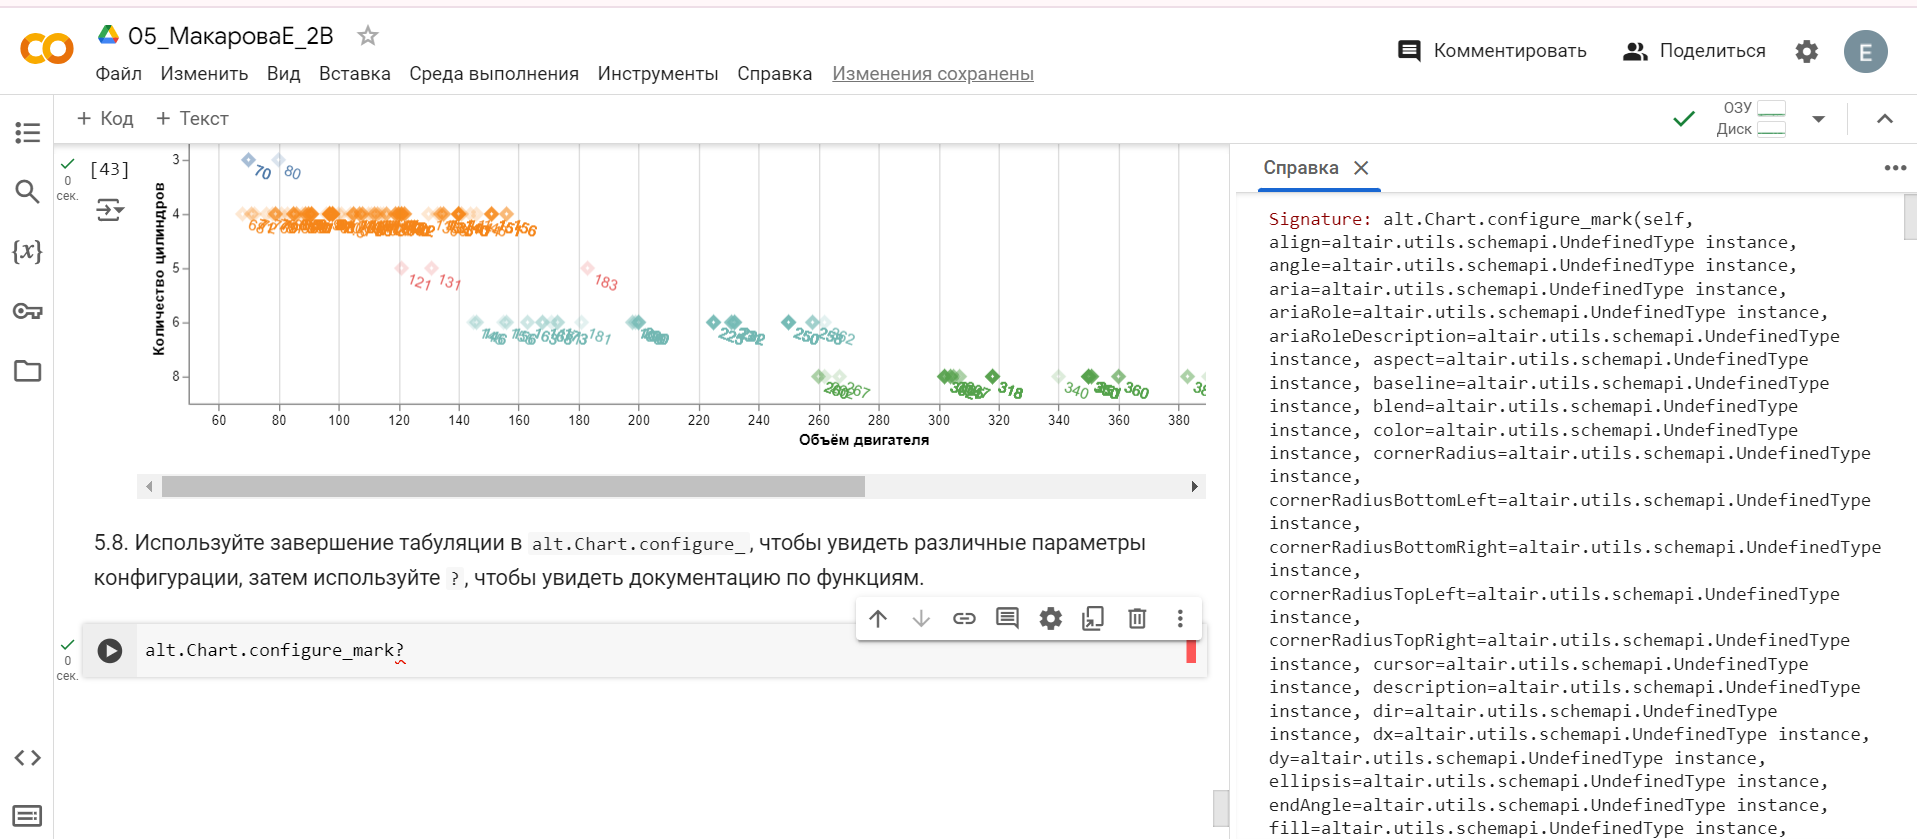